# plant.Watering Prediction Model

## Problem Statement
We should predict the water consumption according to weather data

## Import all libraries

In [127]:
# Show Plot immedeately
%matplotlib inline 

from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import pymysql.cursors
import pandas as pd
from datetime import datetime
from sklearn import linear_model
import predictiveanalytics as pa

## Import DataSet

In [128]:
r_DataSet = pd.read_csv("data/DataSet.csv")

# Remove Value_sum as Model doesnt learn correctly
r_DataSet = r_DataSet.drop("Value_sum",1)


## Variables

Variable | Description
:------------- |:-------------
Date          |   29 non-null object
Value         |   Pump Duration (predicted variable)29 non-null float64
Time          |   29 non-null object
DateTime_x    |   29 non-null object
DateTime_y    |   29 non-null object
tre200b0      |   Lufttemperatur 2 m über Boden; Stundenmittel 24h ago °C (tre200b0)
ure200b0      |   Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel 24h ago % (ure200b0)
rre150b0      |   Niederschlag; Stundensumme 24h ago mm (rre150b0)
sre000b0      |   Sonnenscheindauer; Stundensumme 24h ago min (sre000b0)
fu3010b0      |   Windgeschwindigkeit skalar; Stundenmittel 24h ago km/h (fu3010b0)
prestab0      |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
tre200b0_mean |   24h-Mean Lufttemperatur 2 m über Boden; Stundenmittel (from -48h to -24h) °C (tre200b0)
ure200b0_mean |  24h-Mean Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel (from -48h to -24h) % (ure200b0)
rre150b0_mean  |   24h-Summe Niederschlag; Stundenmittel (from -48h to -24h) mm (rre150b0)
sre000b0_mean  |  24h-Summe Sonnenscheindauer; Stundenmittel (from -48h to -24h) min (sre000b0)
fu3010b0_mean |   24h-Mean Windgeschwindigkeit skalar; Stundenmittel (from -48h to -24h) km/h (fu3010b0)
prestab0_mean |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
volumelst72h  |  Pump Duration in the last 72 hours

In [129]:
# Print more than one variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

r_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
Date             100 non-null object
Value            100 non-null float64
tre200b0         100 non-null float64
ure200b0         100 non-null float64
rre150b0         100 non-null float64
sre000b0         100 non-null float64
fu3010b0         100 non-null float64
prestab0         100 non-null float64
tre200b0_mean    100 non-null float64
ure200b0_mean    100 non-null float64
rre150b0_mean    100 non-null float64
sre000b0_mean    100 non-null float64
fu3010b0_mean    100 non-null float64
prestab0_mean    100 non-null float64
dtypes: float64(13), object(1)
memory usage: 11.0+ KB


## Lineares Model

In [130]:
r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value != 480) & (r_DataSet.Value < 800)]
#r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value < 600) & (r_DataSet.Value != 480)]
#r_DataSet = r_DataSet[(r_DataSet.Value < 100)]
#r_DataSet = r_DataSet[(r_DataSet.Value > 600)]

r_DataSet.describe()

,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_mean,sre000b0_mean,fu3010b0_mean,prestab0_mean
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000
mean,473.097980,16.048000,64.886000,0.070000,6.120000,7.768000,901.786000,15.095583,70.236333,1.082500e-01,18.358333,5.291333,922.241750
std,194.038023,8.025043,21.519464,0.398594,14.858022,6.029399,230.233884,7.071464,17.251312,3.014615e-01,13.135932,2.174920,190.245710
min,109.288000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,324.092250,10.725000,58.650000,0.000000,0.000000,4.300000,955.075000,12.473958,68.191667,2.502628e-15,5.468750,4.025000,956.809375
50%,499.037000,17.700000,68.600000,0.000000,0.000000,6.100000,959.800000,17.102083,73.437500,2.964064e-15,17.062500,5.418750,961.656250
75%,616.903500,22.650000,78.150000,0.000000,0.750000,10.325000,962.650000,20.692708,79.181250,1.145833e-02,31.822917,6.139583,964.463542
max,796.252000,25.700000,94.000000,2.800000,60.000000,31.000000,972.300000,23.945833,94.912500,1.600000e+00,37.333333,11.200000,971.366667


### Divide DataSet into TrainingSet (60%) and TestSet (100%) and Define Training Variable (y) and Explanation Variables (X)

In [131]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

p_TrainSet = r_DataSet.sample(frac=0.6, replace=True) #60% of Data
p_TestSet = r_DataSet #100% of Data

Xtrain = p_TrainSet.loc[:,"tre200b0":]

yTrain = p_TrainSet.Value
yTest = p_TestSet.Value

# Test Model, get X and y from TestSet
Xtest = p_TestSet.loc[:,"tre200b0":]

#### Prepare (poly,scale) Features

In [132]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import PolynomialFeatures

polyDegree = 3
Xtrain = PolynomialFeatures(degree=polyDegree).fit_transform(Xtrain).astype(int)
Xtest = PolynomialFeatures(degree=polyDegree).fit_transform(Xtest).astype(int)

from sklearn import preprocessing
X_min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = X_min_max_scaler.fit_transform(Xtrain)
y_min_max_scaler = preprocessing.MinMaxScaler()
yTrain_minmax = y_min_max_scaler.fit_transform(yTrain)

X_test_minmax = X_min_max_scaler.transform(Xtest)
yTest_minmax = y_min_max_scaler.transform(yTest)

#X_min_max_scaler.scale_ 
#y_min_max_scaler.scale_ 

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preproces

### Train Linear Regression and Set Train Variables

Mean squared error: 0.04


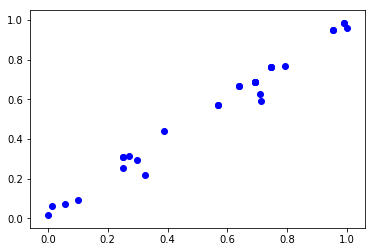

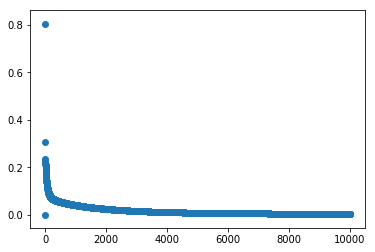

In [133]:
regr = pa.LinearRegression(X_train_minmax, yTrain_minmax)
regr.fit(10000, 0.01)

# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_train_minmax) - yTrain_minmax) ** 2) ** 0.5)

# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(Xtrain, yTrain))

# Plot outputs

plt.scatter(yTrain_minmax, regr.predict(X_train_minmax), color='blue')
plt.show()
plt.scatter(np.arange(0,regr.costH.size), regr.costH)

#regr.coeff__

Mean squared error: 1.88


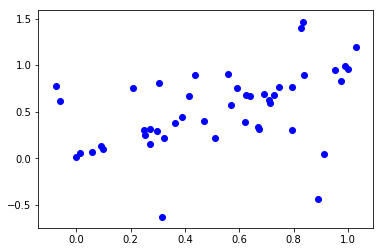

,y,x
0,0.826841,1.400237
1,1.000000,0.959186
2,0.727435,0.675318
3,0.592756,0.758260
4,0.953504,0.951126
5,0.568706,0.570148
6,0.990380,0.985184
7,0.057245,0.071754
8,0.713005,0.592737
9,1.027661,1.198382


In [134]:
from sklearn.externals import joblib
#joblib.dump(regr, 'lr_medium_values.pkl', compress=9)

model_clone = regr
#model_clone = joblib.load('lr_medium_values.pkl')

error = ((regr.predict(X_test_minmax) - yTest_minmax) ** 2) ** 0.5
# Explained variance score: 1 is perfect prediction
print("Mean squared error: %.2f"
      % np.mean(error))

K = 3
yTest_minmax = np.delete(yTest_minmax,np.argpartition(error,-K)[-K:],0)
X_test_minmax = np.delete(X_test_minmax,np.argpartition(error,-K)[-K:],0)

plt.scatter(yTest_minmax, model_clone.predict(X_test_minmax), color='blue')
plt.show()

TestDF = pd.DataFrame()
TestDF = TestDF.assign(y = yTest_minmax)
TestDF = TestDF.assign(x = model_clone.predict(X_test_minmax))
TestDF

In [136]:
#Save the model
#joblib.dump(regr, 'data/myLinReg.pkl')

#joblib.dump(X_min_max_scaler, 'data/X_min_max_scaler.pkl')
#joblib.dump(y_min_max_scaler, 'data/y_min_max_scaler.pkl')


['data/myLinReg.pkl']

['data/X_min_max_scaler.pkl']

['data/y_min_max_scaler.pkl']

#### Port your model to other languages
Very good source for porting pkl (Pickle) Files to other langauges
https://github.com/nok/sklearn-porter